In [1]:
!nvidia-smi

Sun Dec 24 20:14:42 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__, tfds.__version__)

2.15.0 4.9.4


In [3]:
(ds_train, ds_test), ds_info = tfds.load('mnist', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)

In [4]:
#TFDS provides images of type tf.uint8 whereas the model expects tf.float32, hence normalization is required.
def normalize_images(image,label):
  return tf.cast(image, tf.float32) / 255., label

#Applying the normalization function to all the images and then the num_parallel_calls parameter is for parallel processing
ds_train = ds_train.map(normalize_images, num_parallel_calls=tf.data.AUTOTUNE)

#is used to cache the elements of the ds_train dataset, either in memory or on local storage.
#This can significantly improve the performance of the data pipeline by saving operations like file opening and data reading from being executed during each epoch.
#The caching is particularly beneficial when the dataset is being read from a slow storage system, such as a network drive.
#By caching the dataset, the time-consuming part is only executed during the first epoch, and subsequent epochs will reuse the cached data, leading to faster data access and processing
ds_train = ds_train.cache()

# ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
# ds_train = ds_train.batch(128)
# ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [7]:
num_train_examples = ds_info.splits['train'].num_examples
num_test_examples = ds_info.splits['test'].num_examples
print("Number of training examplesL {}".format(num_train_examples))
print("Number of testing examples: {}".format(num_test_examples))

Number of training examplesL 60000
Number of testing examples: 10000


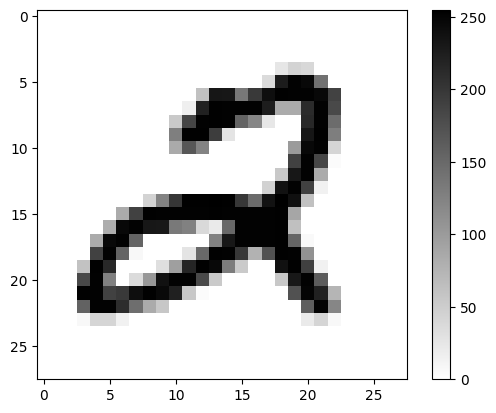

In [9]:
for image, label in ds_test.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

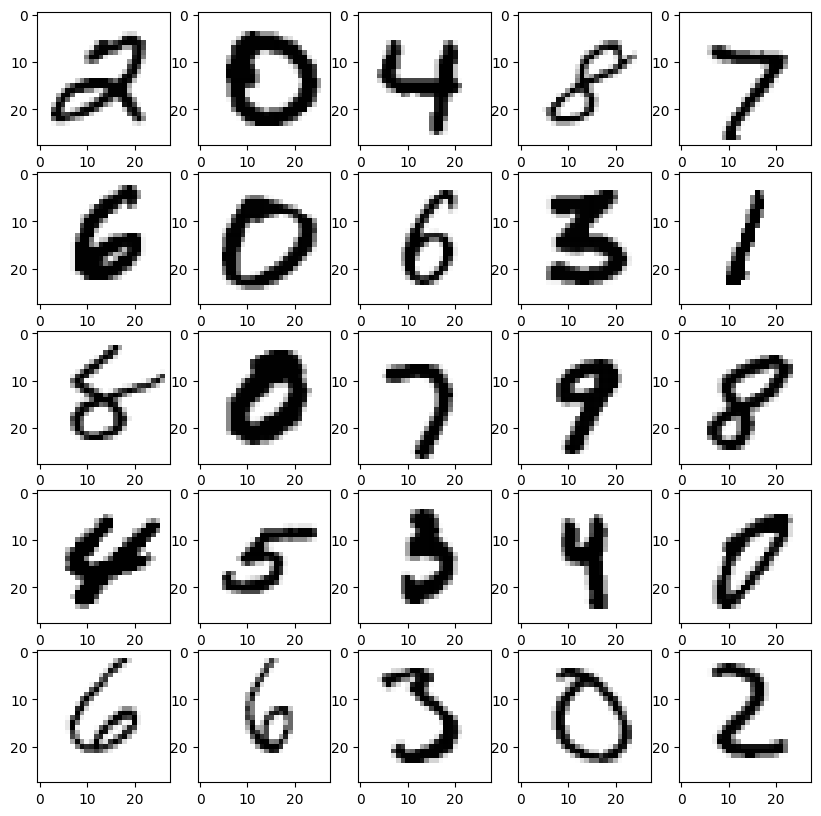

In [12]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in ds_test.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  # plt.xticks([])
  # plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  i += 1
plt.show()